In [247]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [4]:
from sklearn import preprocessing

/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [97]:
data = pd.read_csv("train.csv")

In [6]:
w_test_data = pd.read_csv("test 2 (1).csv")
sample_submission = pd.read_csv("sample_submission (1).csv")

## Data Cleaning and Feature Engineering

In [132]:
def transform_my_data(data):
    
    dummies = pd.get_dummies(data.DepartmentDescription)
    data[dummies.columns] = dummies 
    data['Weekday'] = data['Weekday'].map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, 
                                           "Saturday": 6, "Sunday": 7})
    data_dummies = data.iloc[:,7:]
    data_dummies = data_dummies.apply(lambda x: x*data["ScanCount"])
    data_dummies = data_dummies.replace(-0,0)

    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    #data = data[["TripType", "VisitNumber", "Weekday", "ScanCount", "Return"]]
    data = data.rename(columns={"ScanCount":"NumItems"})
    #data = pd.concat([data, data_dummies], axis=1)
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, "TripType": np.max, 'NumItems': np.sum, 'Return': np.max, 
              '1-HR PHOTO': np.sum, 'ACCESSORIES': np.sum,
       'AUTOMOTIVE': np.sum, 'BAKERY': np.sum, 'BATH AND SHOWER': np.sum, 'BEAUTY': np.sum, 'BEDDING': np.sum,
       'BOOKS AND MAGAZINES': np.sum, 'BOYS WEAR': np.sum, 'BRAS & SHAPEWEAR': np.sum,
       'CAMERAS AND SUPPLIES': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum, 'CELEBRATION': np.sum,
       'COMM BREAD': np.sum, 'CONCEPT STORES': np.sum, 'COOK AND DINE': np.sum, 'DAIRY': np.sum, 'DSD GROCERY': np.sum,
       'ELECTRONICS': np.sum, 'FABRICS AND CRAFTS': np.sum, 'FINANCIAL SERVICES': np.sum,
       'FROZEN FOODS': np.sum, 'FURNITURE': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum,
       'GROCERY DRY GOODS': np.sum, 'HARDWARE': np.sum, 'HEALTH AND BEAUTY AIDS': np.sum, 'HOME DECOR': np.sum,
       'HOME MANAGEMENT': np.sum, 'HORTICULTURE AND ACCESS': np.sum,
       'HOUSEHOLD CHEMICALS/SUPP': np.sum, 'HOUSEHOLD PAPER GOODS': np.sum,
       'IMPULSE MERCHANDISE': np.sum, 'INFANT APPAREL': np.sum, 'INFANT CONSUMABLE HARDLINES': np.sum,
       'JEWELRY AND SUNGLASSES': np.sum, 'LADIES SOCKS': np.sum, 'LADIESWEAR': np.sum,
       'LARGE HOUSEHOLD GOODS': np.sum, 'LAWN AND GARDEN': np.sum, 'LIQUOR,WINE,BEER': np.sum,
       'MEAT - FRESH & FROZEN': np.sum, 'MEDIA AND GAMING': np.sum, 'MENS WEAR': np.sum, 'MENSWEAR': np.sum,
       'OFFICE SUPPLIES': np.sum, 'OPTICAL - FRAMES': np.sum, 'OPTICAL - LENSES': np.sum,
       'OTHER DEPARTMENTS': np.sum, 'PAINT AND ACCESSORIES': np.sum, 'PERSONAL CARE': np.sum,
       'PETS AND SUPPLIES': np.sum, 'PHARMACY OTC': np.sum, 'PHARMACY RX': np.sum,
       'PLAYERS AND ELECTRONICS': np.sum, 'PLUS AND MATERNITY': np.sum, 'PRE PACKED DELI': np.sum,
       'PRODUCE': np.sum, 'SEAFOOD': np.sum, 'SEASONAL': np.sum, 'SERVICE DELI': np.sum, 'SHEER HOSIERY': np.sum,
       'SHOES': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum, 'SPORTING GOODS': np.sum,
       'SWIMWEAR/OUTERWEAR': np.sum, 'TOYS': np.sum, 'WIRELESS': np.sum})
    data = grouped[["TripType", "Weekday", "NumItems", "Return",'1-HR PHOTO', 'ACCESSORIES',
           'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
           'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
           'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
           'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
           'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
           'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
           'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
           'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
           'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
           'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
           'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
           'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
           'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
           'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
           'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
           'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
           'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
           'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
           'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
           'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']]
    features = ["Weekday", "NumItems", "Return", 'ACCESSORIES',
       'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
       'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
       'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
       'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
       'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
       'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
       'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
       'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
       'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']
    data['TripType'] = data['TripType'].map({3:0, 4:1, 5:2, 6:3, 7:4, 8:5, 9:6, 12:7, 14:8, 15:9,  
                                         18:10, 19:11, 20:12, 21:13, 22:14, 23:15, 24:16, 25:17, 26:18,  
                                         27:19, 28:20, 29:21, 30:22, 31:23, 32:24, 33:25, 34:26, 35:27, 
                                         36:28, 37:29, 38:30, 39:31, 40:32, 41:33, 42:34, 43:35, 44:36, 999:37})
    return data

In [99]:
data = transform_my_data(data)

In [100]:
data.head()

,TripType,Weekday,NumItems,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,37,5,-1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,22,5,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,18,5,28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,5,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,5,5,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
def transform_w_data(data):
    dummies = pd.get_dummies(data.DepartmentDescription)
    data[dummies.columns] = dummies 
    data['Weekday'] = data['Weekday'].map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5,
                                           "Saturday": 6, "Sunday": 7})
    data_dummies = data.iloc[:,7:]
    data_dummies = data_dummies.apply(lambda x: x*data["ScanCount"])
    data_dummies = data_dummies.replace(-0,0)
    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    data = data[["VisitNumber", "Weekday", "ScanCount", "Return"]]
    data = data.rename(columns={"ScanCount":"NumItems"})
    data = pd.concat([data, data_dummies], axis=1)
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, 'NumItems': np.sum, 'Return': np.max, 
                'ACCESSORIES': np.sum,
           'AUTOMOTIVE': np.sum, 'BAKERY': np.sum, 'BATH AND SHOWER': np.sum, 'BEAUTY': np.sum, 'BEDDING': np.sum,
           'BOOKS AND MAGAZINES': np.sum, 'BOYS WEAR': np.sum, 'BRAS & SHAPEWEAR': np.sum,
           'CAMERAS AND SUPPLIES': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum, 'CELEBRATION': np.sum,
           'COMM BREAD': np.sum, 'CONCEPT STORES': np.sum, 'COOK AND DINE': np.sum, 'DAIRY': np.sum, 'DSD GROCERY': np.sum,
           'ELECTRONICS': np.sum, 'FABRICS AND CRAFTS': np.sum, 'FINANCIAL SERVICES': np.sum,
           'FROZEN FOODS': np.sum, 'FURNITURE': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum,
           'GROCERY DRY GOODS': np.sum, 'HARDWARE': np.sum, 'HOME DECOR': np.sum,
           'HOME MANAGEMENT': np.sum, 'HORTICULTURE AND ACCESS': np.sum,
           'HOUSEHOLD CHEMICALS/SUPP': np.sum, 'HOUSEHOLD PAPER GOODS': np.sum,
           'IMPULSE MERCHANDISE': np.sum, 'INFANT APPAREL': np.sum, 'INFANT CONSUMABLE HARDLINES': np.sum,
           'JEWELRY AND SUNGLASSES': np.sum, 'LADIES SOCKS': np.sum, 'LADIESWEAR': np.sum,
           'LARGE HOUSEHOLD GOODS': np.sum, 'LAWN AND GARDEN': np.sum, 'LIQUOR,WINE,BEER': np.sum,
           'MEAT - FRESH & FROZEN': np.sum, 'MEDIA AND GAMING': np.sum, 'MENS WEAR': np.sum, 'MENSWEAR': np.sum,
           'OFFICE SUPPLIES': np.sum, 'OPTICAL - FRAMES': np.sum, 'OPTICAL - LENSES': np.sum,
           'OTHER DEPARTMENTS': np.sum, 'PAINT AND ACCESSORIES': np.sum, 'PERSONAL CARE': np.sum,
           'PETS AND SUPPLIES': np.sum, 'PHARMACY OTC': np.sum, 'PHARMACY RX': np.sum,
           'PLAYERS AND ELECTRONICS': np.sum, 'PLUS AND MATERNITY': np.sum, 'PRE PACKED DELI': np.sum,
           'PRODUCE': np.sum, 'SEAFOOD': np.sum, 'SEASONAL': np.sum, 'SERVICE DELI': np.sum, 'SHEER HOSIERY': np.sum,
           'SHOES': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum, 'SPORTING GOODS': np.sum,
           'SWIMWEAR/OUTERWEAR': np.sum, 'TOYS': np.sum, 'WIRELESS': np.sum})
    data = grouped[["Weekday", "NumItems", "Return", 'ACCESSORIES',
               'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
               'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
               'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
               'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
               'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
               'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
               'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
               'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
               'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
               'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
               'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
               'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
               'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
               'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
               'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
               'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
               'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
               'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
               'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
               'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']]
    #data['TripType'] = data['TripType'].map({3:0, 4:1, 5:2, 6:3, 7:4, 8:5, 9:6, 12:7, 14:8, 15:9,  
                                         #18:10, 19:11, 20:12, 21:13, 22:14, 23:15, 24:16, 25:17, 26:18,  
                                         #27:19, 28:20, 29:21, 30:22, 31:23, 32:24, 33:25, 34:26, 35:27, 
                                         #36:28, 37:29, 38:30, 39:31, 40:32, 41:33, 42:34, 43:35, 44:36, 999:37})
    return data

In [126]:
test_features = ["Weekday", "NumItems", "Return", 'CategoryCounts', 'ACCESSORIES', 
           'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
           'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
           'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
           'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
           'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
           'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
           'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
           'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
           'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
           'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
           'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
           'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
           'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
           'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
           'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
           'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
           'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
           'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
           'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
           'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']
features = ["Weekday", "NumItems", "Return", 'CategoryCounts', 'ACCESSORIES',
       'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
       'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
       'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
       'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
       'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
       'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
       'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
       'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
       'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']

In [70]:
test = transform_w_data(w_test_data)

## Local Modeling

### Logistic Regression

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [103]:
mytrain, mytest = train_test_split(data, test_size = .4)
mytrain.TripType = mytrain.TripType.astype(float)
mytrain.Weekday = mytrain.Weekday.astype(float)  
mytrain.NumItems = mytrain.NumItems.astype(float)                         
mytest.TripType = mytest.TripType.astype(float)
mytest.Weekday = mytest.Weekday.astype(float)  
mytest.NumItems = mytest.NumItems.astype(float) 

/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/pandas/core/generic.py:2273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [136]:
def model_testdata(data):
    lr = LogisticRegression()
    lr.fit(X = np.asarray(data[test_features]), y = np.asarray(mytrain.TripType))
lr = LogisticRegression()
lr.fit(X = np.asarray(mytrain[features]), y = np.asarray(mytrain.TripType))

In [138]:
predictions = lr.predict_proba(np.asarray(mytest[features]))
predictions_notproba = lr.predict(np.asarray(mytest[features]))

In [139]:
log_loss(mytest.TripType, predictions).round(5)

In [145]:
sklearn.metrics.accuracy_score(mytest.TripType, predictions_notproba)

0.63263652991899655

### Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
import sklearn

In [72]:
forest = RandomForestClassifier(n_estimators = 300, max_features=2)

In [98]:
forest = forest.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

In [74]:
predictions = forest.predict_proba(np.asarray(mytest[features]))
predictions_notproba = forest.predict(np.asarray(mytest[features]))
log_loss(mytest.TripType, predictions).round(5)
sklearn.metrics.accuracy_score(mytest.TripType, predictions_notproba)

### Extra Trees 

In [97]:
#from sklearn.ensemble import ExtraTreesClassifier
#extratrees = ExtraTreesClassifier(n_estimators = 100, max_features=3)
#extratrees = extratrees.fit(np.asarray(mytrain[features]), 
                    #np.asarray(mytrain.TripType))
#predictions = extratrees.predict_proba(np.asarray(mytest[features]))
#log_loss(mytest.TripType, predictions).round(5)

### Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. 

Can't use multinomial distribution because it needs all positive feature values, and some of mine are negative due to returns'

In [212]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [44]:
gnb = GaussianNB()
gnb = gnb.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

In [45]:
predictions = gnb.predict_proba(np.asarray(mytest[features]))

In [54]:
log_loss(mytest.TripType, predictions).round(5)

30.041070000000001

That...didn't work

In [278]:
bnb = BernoulliNB()
bnb = bnb.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

In [279]:
predictions = bnb.predict_proba(np.asarray(mytest[test_features]))
log_loss(mytest.TripType, predictions).round(5)

1.38195

Oh wow, that actually did work well. Hey now Bernoulli Naive Bayes.

BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter).

### Nearest Neighbor

In [19]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

In [25]:
knc = KNeighborsClassifier()

In [219]:
knc = knc.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

In [75]:
predictions = knc.predict_proba(np.asarray(mytest[features]))
log_loss(mytest.TripType, predictions).round(5)

6.26328

In [76]:
knc = KNeighborsClassifier(algorithm='ball_tree')

In [77]:
knc = knc.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))
predictions = knc.predict_proba(np.asarray(mytest[features]))
log_loss(mytest.TripType, predictions).round(5)

6.3121700000000001

In [29]:
### Linear and Quadratic Discriminant Analysis

In [67]:
from sklearn.svm import LinearSVC

In [68]:
lsvc = LinearSVC()
lsvc = lsvc.fit(np.asarray(mytrain[features]), 
                    np.asarray(mytrain.TripType))

In [74]:
predictions = lsvc.decision_function(np.asarray(mytest[features]))
log_loss(mytest.TripType, predictions).round(5)

4.4655800000000001

### XGBoost (eXtreme Gradient Boosting, or Boosted Trees)

In [114]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss

In [115]:
data = pd.read_csv("train.csv")

In [116]:
dummy_data = fineline_dummies(data)

In [117]:
data = transform_my_data(data)

In [120]:
data = add_category_counts(data)

In [133]:
mytrain, mytest = train_test_split(data, test_size = .4)

In [134]:
mytrain_train = mytrain[features]
mytest_train = mytest[test_features]
mytrain_train = mytrain_train.join(dummy_data)
mytest_train = mytest_train.join(dummy_data)

In [135]:
dtrain = xgb.DMatrix(np.asarray(mytrain_train), label = np.asarray(mytrain.TripType))
dtest = xgb.DMatrix(np.asarray(mytest_train), label = np.asarray(mytest.TripType))

In [136]:
num_round = 200
param = {'objective': 'multi:softprob', 'num_class':38, 
         'eval_metric': 'mlogloss', "max_delta_step": 1}
watchlist = [(dtrain,'train'), (dtest, 'eval')]


In [137]:
bst = xgb.train(param, dtrain, num_round, watchlist, 
                early_stopping_rounds=3)

Will train until eval error hasn't decreased in 3 rounds.
[0]	train-mlogloss:3.259662	eval-mlogloss:3.266433
[1]	train-mlogloss:2.902390	eval-mlogloss:2.916641
[2]	train-mlogloss:2.568845	eval-mlogloss:2.591510
[3]	train-mlogloss:2.263130	eval-mlogloss:2.295039
[4]	train-mlogloss:1.990418	eval-mlogloss:2.032353
[5]	train-mlogloss:1.756034	eval-mlogloss:1.807672
[6]	train-mlogloss:1.561834	eval-mlogloss:1.624216
[7]	train-mlogloss:1.402185	eval-mlogloss:1.473554
[8]	train-mlogloss:1.275923	eval-mlogloss:1.355884
[9]	train-mlogloss:1.180866	eval-mlogloss:1.268394
[10]	train-mlogloss:1.106365	eval-mlogloss:1.201337
[11]	train-mlogloss:1.045933	eval-mlogloss:1.147677
[12]	train-mlogloss:0.997576	eval-mlogloss:1.105806
[13]	train-mlogloss:0.955372	eval-mlogloss:1.069839
[14]	train-mlogloss:0.919019	eval-mlogloss:1.039698
[15]	train-mlogloss:0.889150	eval-mlogloss:1.016149
[16]	train-mlogloss:0.863189	eval-mlogloss:0.996453
[17]	train-mlogloss:0.841730	eval-mlogloss:0.980214
[18]	train-mlogl

In [139]:
my_test = xgb.DMatrix(np.asarray(mytest_train))
test_predictions = bst1.predict(my_test)
#log_loss(mytest.TripType, test_predictions).round(5)

In [138]:
##predicting percentage accuracy and individual predictions

num_round = 200
param1 = {'objective': 'multi:softmax', 'num_class':38}
watchlist1 = [(dtrain,'train'), (dtest, 'eval')]

bst1 = xgb.train(param1, dtrain, num_round, watchlist1, early_stopping_rounds=5)

Will train until eval error hasn't decreased in 5 rounds.
[0]	train-merror:0.361525	eval-merror:0.370682
[1]	train-merror:0.331980	eval-merror:0.344865
[2]	train-merror:0.318915	eval-merror:0.335537
[3]	train-merror:0.309978	eval-merror:0.330154
[4]	train-merror:0.304822	eval-merror:0.326313
[5]	train-merror:0.297732	eval-merror:0.322603
[6]	train-merror:0.293272	eval-merror:0.320172
[7]	train-merror:0.288691	eval-merror:0.317873
[8]	train-merror:0.283151	eval-merror:0.315208
[9]	train-merror:0.278326	eval-merror:0.313849
[10]	train-merror:0.274807	eval-merror:0.312621
[11]	train-merror:0.272106	eval-merror:0.311863
[12]	train-merror:0.268361	eval-merror:0.310191
[13]	train-merror:0.264215	eval-merror:0.308545
[14]	train-merror:0.261027	eval-merror:0.307839
[15]	train-merror:0.257944	eval-merror:0.306376
[16]	train-merror:0.255191	eval-merror:0.305278
[17]	train-merror:0.251272	eval-merror:0.303867
[18]	train-merror:0.247979	eval-merror:0.303710
[19]	train-merror:0.245227	eval-merror:0

test data 

In [211]:
w_test_data = pd.read_csv("test 2 (1).csv")
test = transform_w_data(w_test_data)

In [212]:
test = add_category_counts_test(test)

In [214]:
test = fineline_dummies_test(test)

In [215]:
walmart_test = xgb.DMatrix(np.asarray(test))
predictions = bst.predict(walmart_test)

In [216]:
# remember to change .csv file before entering
predictions_to_csv(predictions)

Maxes for each probability type without the fineline numbers

These are the maxes for each trip type probability using the fineline numbers

### Without Return Column

In [85]:
data = transform_my_data(data)

In [90]:
mytrain, mytest = train_test_split(data, test_size = .4)

In [92]:
lr = LogisticRegression()
lr.fit(X = np.asarray(mytrain[features]), y = np.asarray(mytrain.TripType))
predictions = lr.predict_proba(np.asarray(mytest[features]))

In [93]:
log_loss(mytest.TripType, predictions).round(5)

1.4906200000000001

Ok cool, so the return column did help. Maybe I should multiply it's importance!

### Using Most Frequent Fineline Numbers

In [113]:
def fineline_dummies(original_data):
    fineline_ranks = original_data.FinelineNumber.value_counts()
    fineline_ranks = fineline_ranks[fineline_ranks > 500]
    columns1 = list(fineline_ranks.index)
    dummies = pd.get_dummies(original_data.FinelineNumber)
    dummies = dummies[columns1]
    data_visit = original_data[["VisitNumber"]]
    dummy_data = pd.concat([dummies, data_visit], axis=1)
    dummy_data = dummy_data.groupby("VisitNumber")
    dummy_data = dummy_data.aggregate(np.sum)
    return dummy_data

def fineline_dummies_test(test):
    data1 = pd.read_csv("train.csv")
    fineline_ranks = data1.FinelineNumber.value_counts()
    fineline_ranks = fineline_ranks[fineline_ranks > 500]
    columns1 = list(fineline_ranks.index)
    data1 = pd.read_csv("test 2 (1).csv")
    dummies = pd.get_dummies(data1.FinelineNumber)
    dummies = dummies[columns1]
    data_visit = data1[["VisitNumber"]]
    dummy_data = pd.concat([dummies, data_visit], axis=1)
    dummy_data = dummy_data.groupby("VisitNumber")
    dummy_data = dummy_data.aggregate(np.sum)
    test = test.join(dummy_data)
    return test

### Category Count Feature

In [65]:
data = pd.read_csv("train.csv")
data = transform_my_data(data)

In [119]:
def add_category_counts(data):
    alist = []
    for array in np.asarray(data.iloc[:,4:]):
        count = 0
        for item in array:
            if item > 0:
                count += 1
        alist.append(count)
    cat_counts = pd.DataFrame(alist)
    cat_counts = cat_counts.rename(columns={0:"CategoryCount"})
    cat_counts = cat_counts.set_index(data.index)
    data.insert(4, 'CategoryCounts', cat_counts)
    return data

def add_category_counts_test(data):
    alist = []
    for array in np.asarray(data.iloc[:,3:]):
        count = 0
        for item in array:
            if item > 0:
                count += 1
        alist.append(count)
    cat_counts = pd.DataFrame(alist)
    cat_counts = cat_counts.rename(columns={0:"CategoryCount"})
    cat_counts = cat_counts.set_index(data.index)
    data.insert(3, 'CategoryCounts', cat_counts)
    return data

## Modeling the Test Data and Exporting to CSV

logistic regression

In [65]:
test_predictions = lr.predict_proba(np.asarray(test[test_features]))

In [33]:
def predictions_to_csv(test_predictions):
    test_predictions = pd.DataFrame(test_predictions)
    test_indexes = test.index
    test_predictions = test_predictions.rename(columns = {0:"TripType_3", 1: "TripType_4", 2: "TripType_5", 3: "TripType_6", 
                4: "TripType_7", 5: "TripType_8", 6: "TripType_9", 7: "TripType_12", 8: "TripType_14", 
                9: "TripType_15", 10: "TripType_18", 11: "TripType_19", 12: "TripType_20", 13: "TripType_21",
                14: "TripType_22", 15: "TripType_23", 16: "TripType_24", 17: "TripType_25", 18: "TripType_26", 
                19: "TripType_27", 20: "TripType_28", 21: "TripType_29", 22: "TripType_30", 23: "TripType_31", 
                24: "TripType_32", 25: "TripType_33", 26: "TripType_34", 27: "TripType_35", 28: "TripType_36", 
                29: "TripType_37", 30: "TripType_38", 31: "TripType_39", 32: "TripType_40", 33: "TripType_41", 
                34: "TripType_42", 35: "TripType_43", 36: "TripType_44", 37: "TripType_999"})
    test_predictions.insert(0, 'VisitNumber', test_indexes)
    return test_predictions.to_csv("submissions/fifth_fineline_xgb.csv", index=False)

In [120]:
predictions.to_csv("submissions/fourth_fineline_xgb.csv", index=False)

random forest, 300 classifiers

In [146]:
test_predictions = forest.predict_proba(np.asarray(test[test_features]))

In [147]:
# remember to change .csv file before entering
predictions_to_csv(test_predictions)

## Analyzing Results

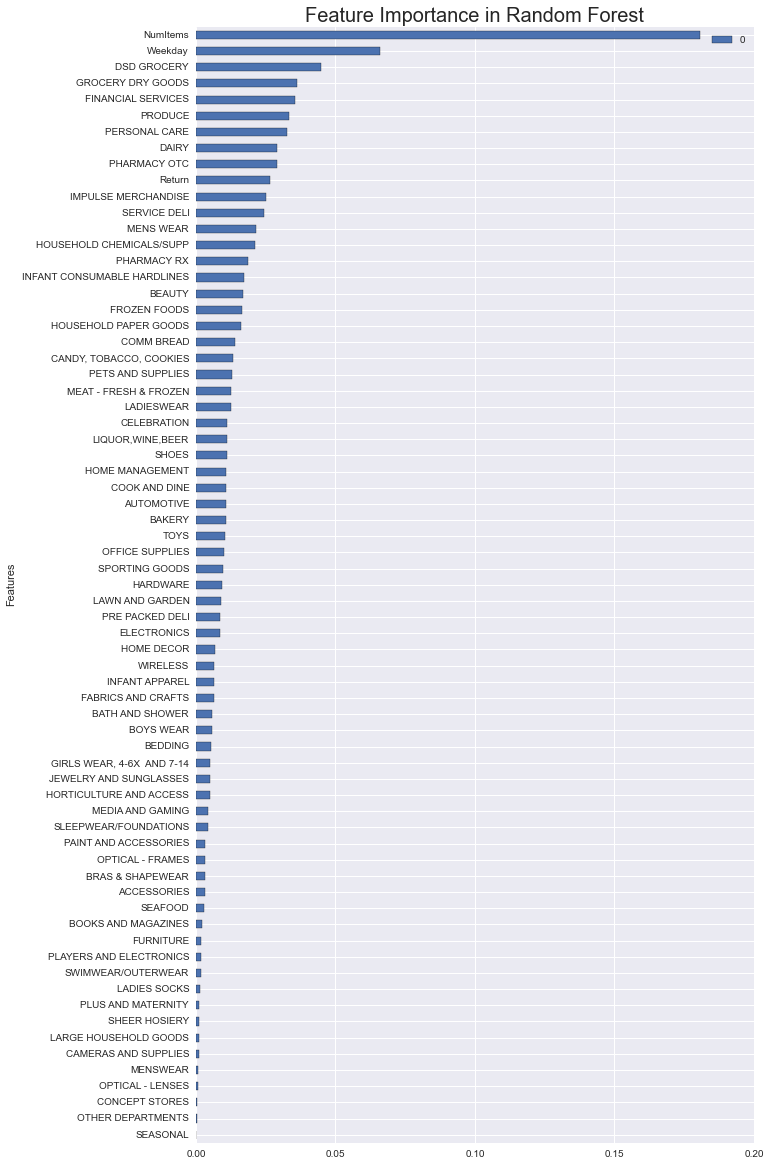

In [528]:
x = forest.feature_importances_
graphing_results = pd.DataFrame(forest.feature_importances_).sort_index()
graphing_results["Features"] = features
graphing_results = graphing_results.set_index("Features").sort_values(by=0, ascending=True)
x = graphing_results.plot(kind="barh", figsize=(10,20), rot=0)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.title("Feature Importance in Random Forest", size=20)

In [ ]:
non_departments = x[0:3]
departments = x[4:]

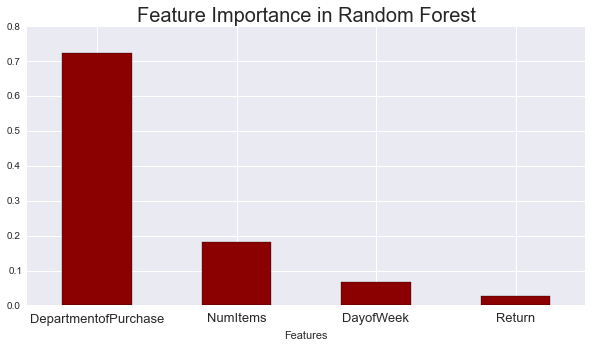

In [532]:
departments = np.sum(departments)
department_data = np.append(non_departments, departments)

graphing_department = pd.DataFrame(department_data).sort_index()
graphing_department["Features"] = ["DayofWeek", "NumItems", "Return", "DepartmentofPurchase"]
graphing_department = graphing_department.set_index("Features").sort_values(by=0, ascending=False)

x = graphing_department.plot(kind="bar", figsize=(10,5), rot=0, color="darkred", legend=False)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=10)
plt.title("Feature Importance in Random Forest", size=20)

In [164]:
test_predictions = pd.DataFrame(test_predictions)
mytest_answers = mytest[["TripType"]]
mytest_answers = mytest_answers.rename(columns={"TripType": "WalmartClass"})
test_predictions = test_predictions.set_index(mytest_answers.index)
test_predictions = test_predictions.rename(columns={0: "Prediction"})
test_predictions = test_predictions.join(mytest_answers)
test_predictions["Prediction"] = test_predictions["Prediction"].map({0:3, 1:4, 2:5, 3:6, 4:7, 5:8, 6:9, 7:12, 8:14, 9:15,  
                                         #10:18, 11:19, 12:20, 13:21, 14:22, 15:23, 16:24, 17:25, 18:26,  
                                         #19:27, 20:28, 21:29, 22:30, 23:31, 24:32, 25:33, 26:34, 27:35, 
                                         #28:36, 29:37, 30:38, 31:39, 32:40, 33:41, 34:42, 35:43, 36:44, 37:999})
test_predictions["WalmartClass"] = test_predictions["WalmartClass"].map({0:3, 1:4, 2:5, 3:6, 4:7, 5:8, 6:9, 7:12, 8:14, 9:15,  
                                         #10:18, 11:19, 12:20, 13:21, 14:22, 15:23, 16:24, 17:25, 18:26,  
                                         #19:27, 20:28, 21:29, 22:30, 23:31, 24:32, 25:33, 26:34, 27:35, 
                                         #28:36, 29:37, 30:38, 31:39, 32:40, 33:41, 34:42, 35:43, 36:44, 37:999})
test_predictions = test_predictions[["WalmartClass", "Prediction"]]

In [172]:
alist = []
for x, y in np.asarray(test_predictions):
    count = 0
    if x == y:
        count = 1
    alist.append(count)

In [173]:
correct = pd.DataFrame(alist)
correct = correct.set_index(mytest_answers.index)
correct = correct.rename(columns={0: "Result"})
test_predictions = test_predictions.join(correct)
prediction_accuracy = test_predictions.set_index(test_predictions["WalmartClass"])
prediction_accuracy = prediction_accuracy[["Result"]]

In [174]:
value_counts = pd.DataFrame(prediction_accuracy.index.value_counts())

In [177]:
prediction_accuracy_groupby = test_predictions.groupby("WalmartClass")
prediction_accuracy_precentage = prediction_accuracy_groupby.agg({'WalmartClass': np.max,
                                                                  "Prediction": np.max,
                                                                  "Result": np.sum})

In [178]:
prediction_accuracy_precentage = prediction_accuracy_precentage[["Result"]]

In [179]:
prediction_accuracy_precentage.head()

,Result
WalmartClass,
3,1358
4,5
5,1541
6,421
7,1653


In [180]:
value_counts = value_counts.sort_index()

In [181]:
prediction_accuracy_precentage = prediction_accuracy_precentage.join(value_counts)

In [182]:
prediction_accuracy_precentage["Accuracy"] = prediction_accuracy_precentage.Result / prediction_accuracy_precentage.WalmartClass

In [183]:
prediction_accuracy_precentage = prediction_accuracy_precentage.sort_values(by="Accuracy", ascending=True)

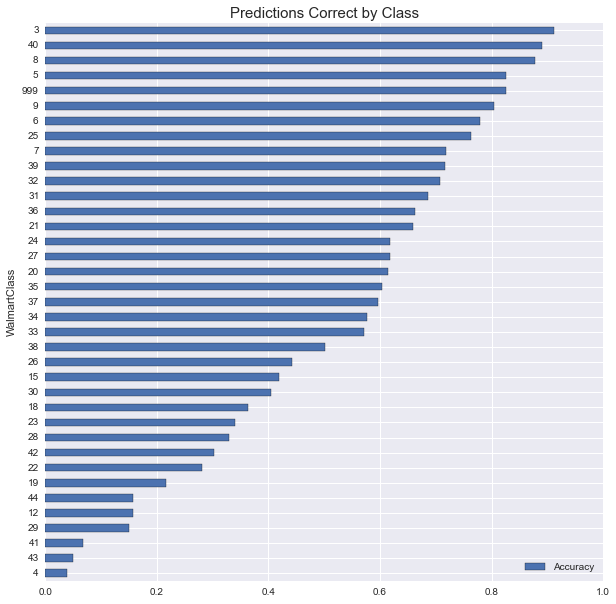

In [184]:
ax = prediction_accuracy_precentage[["Accuracy"]].plot(kind="barh", figsize=(10,10))
plt.title("Predictions Correct by Class", size=15)

Thoughts: Why are there almost no TripType 8 occurences?

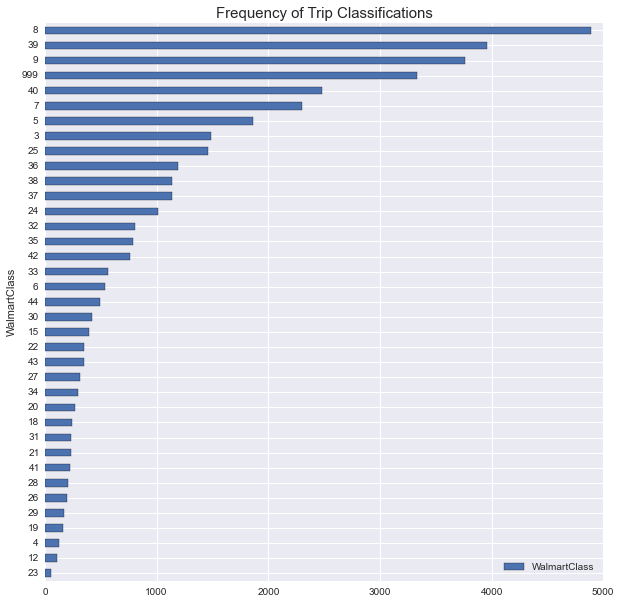

In [220]:
ax = prediction_accuracy_precentage_occurences[["WalmartClass"]].plot(kind="barh", figsize=(10,10))
plt.title("Frequency of Trip Classifications", size=15)

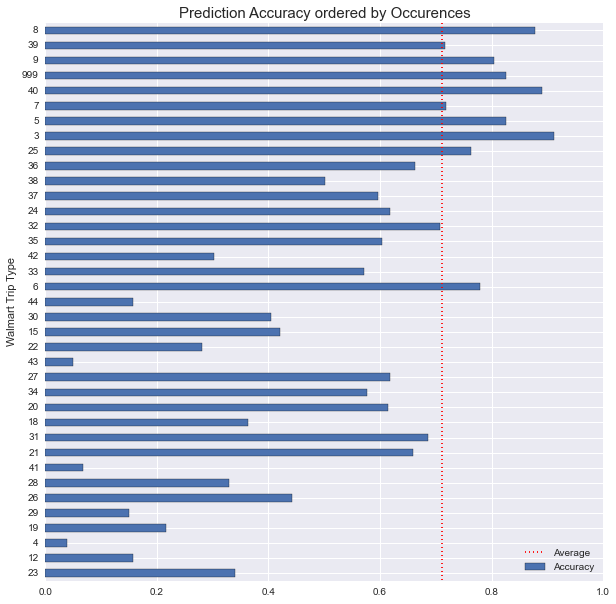

In [244]:
prediction_accuracy_precentage_occurences = prediction_accuracy_precentage.sort_values("WalmartClass")
ax = prediction_accuracy_precentage_occurences[["Accuracy"]].plot(kind="barh", figsize=(10,10))
average_correct = prediction_accuracy_precentage["Result"].sum() / prediction_accuracy_precentage["WalmartClass"].sum()
plt.title("Prediction Accuracy ordered by Occurences", size=15)
plt.vlines(average_correct, -1, 40, color="red", linestyle="dotted")
ax.legend(["Average", "Accuracy"], loc=4)
ax.set_ylabel("Walmart Trip Type")

In [304]:
prediction_accuracy_precentage_accuracy = prediction_accuracy_precentage["Accuracy"]

In [287]:
percentages = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

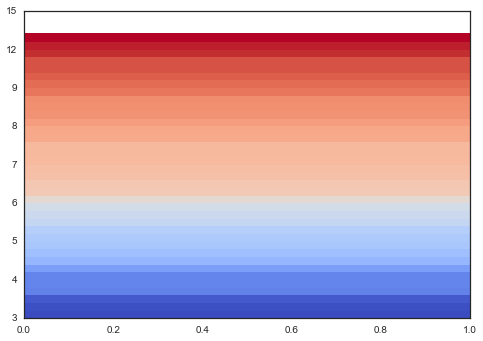

In [393]:
alist = []
for x in prediction_accuracy_precentage_accuracy:
    alist.append(x)

alist = [[x] for x in alist]
accuracies = np.asarray(alist)
x = prediction_accuracy_precentage[["Accuracy"]].sort_index().index.astype(str)

fig, ax = plt.subplots()
heatmap = plt.pcolor(accuracies, cmap=plt.cm.coolwarm)
ax.set_yticklabels(x, minor=False)

In [271]:
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014])

In [430]:
data_triptype[data_triptype.TripType == 8]

,TripType
VisitNumber,
2154,8
12127,8
25078,8
54761,8


In [ ]:
#graph = data_triptype.plot(kind="bar", figsize=(10, 5), color="midnightblue")
#graph.set_title("Number of Occurences by trip type")

In [105]:
data = pd.read_csv("train.csv")

In [103]:
data1 = transform_my_data(data)

In [106]:
data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000
1,30,7,Friday,60538815980,1,SHOES,8931
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017


In [107]:
data1.head()

,TripType,Weekday,NumItems,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,999,5,-1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,30,5,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,26,5,28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8,5,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,8,5,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
